In [1]:
import numpy as np
from helpers import get_dff_fat
from constants_v1 import *
# Plotting
import pandas as pd
from helpers_pd import *
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
sns.set()
# plt.style.use('seaborn-white')
import matplotlib.pyplot as plt

In [2]:
df = get_dff_fat(new=False, copy=True)
df['k_d'] = df.loc[:, 'k_oc'] * df.loc[:,'f_oc']

In [3]:
# list(df)

In [4]:
# For later, 'KGE-d13C_out', 'NSE-d13C_out'
dfs = df[['Model', 
          'z3_factor',
          'cZ0Z1',
          'cZ',
          'c_adr',
          'k_g',
          'gamma01',
          'gammaZ',
          'f_transp',
#           'f_oc',
          'k_d',
          'k_oc',
          'beta_runoff',
          'dt_50_aged',
          'dt_50_ab',
          'dt_50_ref',
          'epsilon_iso',
          'beta_moisture',
          'KGE-CONC-tra', 'KGE-CONC-tot', 'KGE-CONC-det',
          'KGE-d13C-tra',
          'KGE-CONC_out', 'KGE-d13C_out',
          'NSE-CONC-tra', 'NSE-CONC-tot', 'NSE-CONC-det', 
          ]]

In [5]:
print( dfs['KGE-CONC-tra'].max(), dfs['NSE-CONC-tra'].max() )

# dfs['BIAS-CONC_out'].min()
# dfs['BIAS-LDS_out'].min()

(0.712486405538371, 0.47723651096742736)


In [6]:
# ff_out = dfs.loc[(dfs['KGE-CONC-tra'] > 0.0)] # & (dfs['KGE-LDS_out'] > 0) ]
ff_out = dfs.loc[(dfs['NSE-CONC-tra'] > -0.5) & (dfs['KGE-d13C-tra'] > 0.5)] # & (dfs['KGE-LDS_out'] > 0) ]
print(len(ff_out))

490


In [7]:
ff_out.head()

,Model,z3_factor,cZ0Z1,cZ,c_adr,k_g,gamma01,gammaZ,f_transp,k_d,...,beta_moisture,KGE-CONC-tra,KGE-CONC-tot,KGE-CONC-det,KGE-d13C-tra,KGE-CONC_out,KGE-d13C_out,NSE-CONC-tra,NSE-CONC-tot,NSE-CONC-det
LHS_be1fix3/112/,fix,0.882861,0.466585,0.201524,0.863642,1635.935886,0.897126,0.741502,0.195599,68.783476,...,0.985648,0.551554,0.593783,0.600410,0.534124,0.023144,-1.930497,0.242853,0.664302,0.757992
LHS_be1fix3/121/,fix,0.795817,0.678220,0.360769,0.265224,2566.083532,0.771039,0.100754,0.162437,126.582021,...,0.708955,0.623390,0.666928,0.691735,0.790488,-0.574297,0.081745,0.351750,0.667559,0.737762
LHS_be1fix3/134/,fix,0.932018,0.990652,0.541434,0.058186,3036.647665,0.963162,0.943839,0.228667,202.092934,...,0.738772,0.662015,0.684495,0.686319,0.894965,-0.556623,-3.344229,0.412148,0.694054,0.756721
LHS_be1fix3/135/,fix,0.881652,0.744764,0.083064,0.458992,1300.591161,0.257314,0.091741,0.262305,378.218204,...,0.122286,0.343640,0.420040,0.459948,0.541288,-0.663077,0.532935,-0.227208,0.530188,0.698566
LHS_be1fix3/148/,fix,0.924313,0.757313,0.144976,0.640416,3477.250532,0.604089,0.166865,0.708498,51.094939,...,0.781720,0.551618,0.593543,0.600056,0.741371,-0.554847,0.429040,0.242875,0.664753,0.758539


In [8]:
# New constraint
ff_out['IsoSoil'] = ff_out.apply(IsoKGEsoil, args=(0.8,), axis=1)

dm_simp = pd.melt(ff_out, 
                 id_vars=['KGE-CONC-tra', 'NSE-CONC-tra', 'Model', 'IsoSoil'],
             value_vars=['z3_factor',
                         'cZ0Z1',
                         'cZ',
                         'c_adr',
                         'k_g',
                         'gamma01',
                         'gammaZ',
                         'f_transp',
                         'k_d',
#                          'f_oc',
                         'k_oc',
                         'beta_runoff',
                         'dt_50_aged',
                         'dt_50_ab',
                         'dt_50_ref',
                         'epsilon_iso',
                         'beta_moisture'])
dm_simp.head()

,KGE-CONC-tra,NSE-CONC-tra,Model,IsoSoil,variable,value
0,0.551554,0.242853,fix,KGE-d13C < 0.8,z3_factor,0.882861
1,0.623390,0.351750,fix,KGE-d13C < 0.8,z3_factor,0.795817
2,0.662015,0.412148,fix,KGE-d13C > 0.8,z3_factor,0.932018
3,0.343640,-0.227208,fix,KGE-d13C < 0.8,z3_factor,0.881652
4,0.551618,0.242875,fix,KGE-d13C < 0.8,z3_factor,0.924313


## Soils, fix vs. var

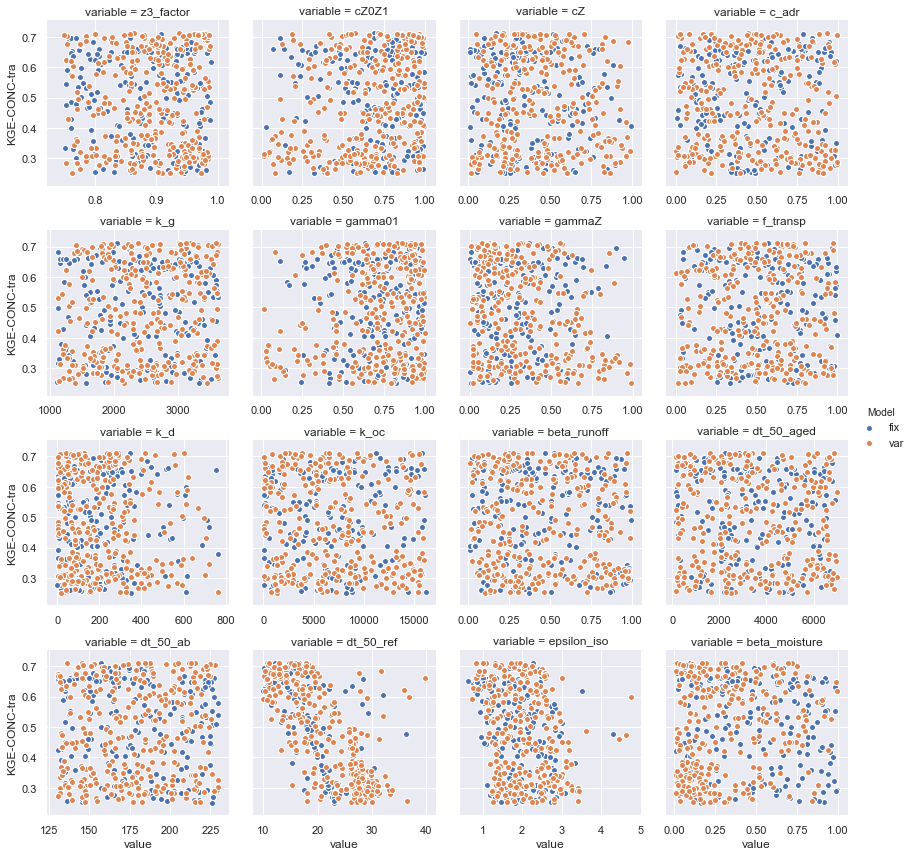

In [9]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-CONC-tra", edgecolor="w").add_legend()

## Soils, IsoConstraint

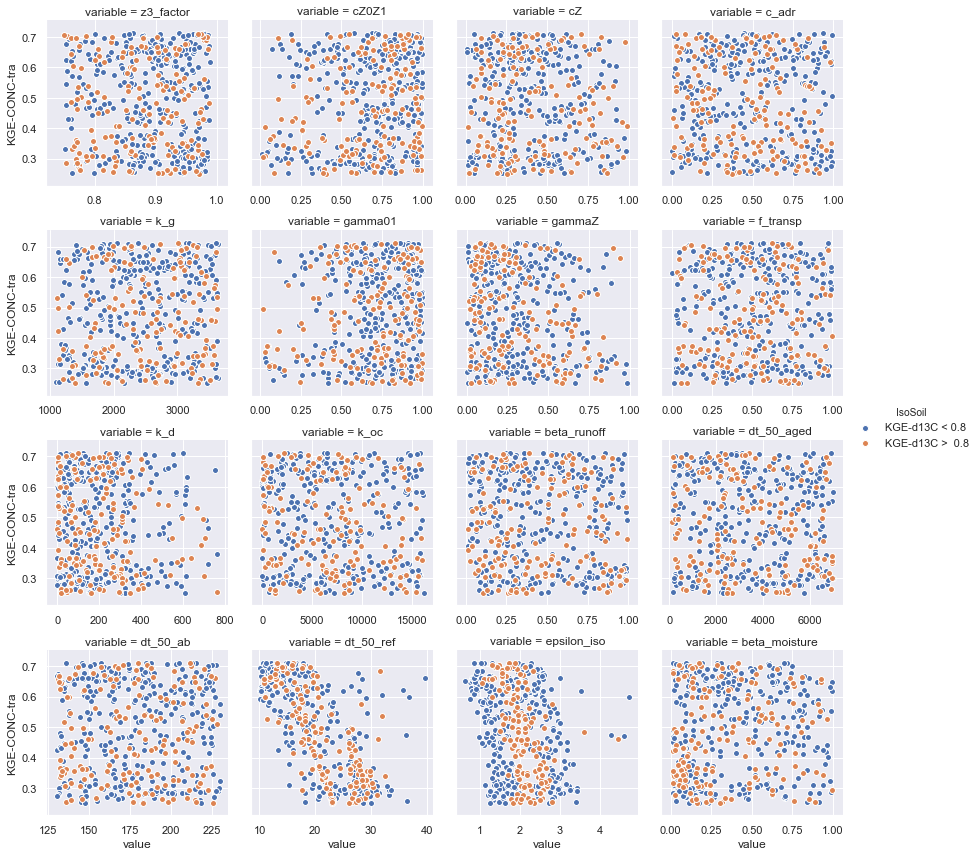

In [10]:
g = sns.FacetGrid(dm_simp, col="variable", hue="IsoSoil", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-CONC-tra", edgecolor="w").add_legend()

May want to show the full separation between models as well!

In [11]:
# ff_out['ModIsoCstr'] = ff_out.apply(ModelIsoKGEsoil, args=(0.8,), axis=1)
ff_out = ff_out.loc[(ff_out['KGE-d13C-tra'] > 0)]
ff_out['ModIsoOut'] = ff_out.apply(ModelIsoKGEout, args=(0.5,), axis=1)

In [12]:
dm = pd.melt(ff_out, 
                 id_vars=['KGE-CONC-tra', 'NSE-CONC-tra', 'Model', 'ModIsoOut'],
             value_vars=['z3_factor',
                         'cZ0Z1',
                         'cZ',
                         'c_adr',
                         'k_g',
                         'gamma01',
                         'gammaZ',
                         'f_transp',
#                          'f_oc',
                         'k_d',
                         'k_oc',
                         'beta_runoff',
                         'dt_50_aged',
                         'dt_50_ab',
                         'dt_50_ref',
                         'epsilon_iso',
                         'beta_moisture'])

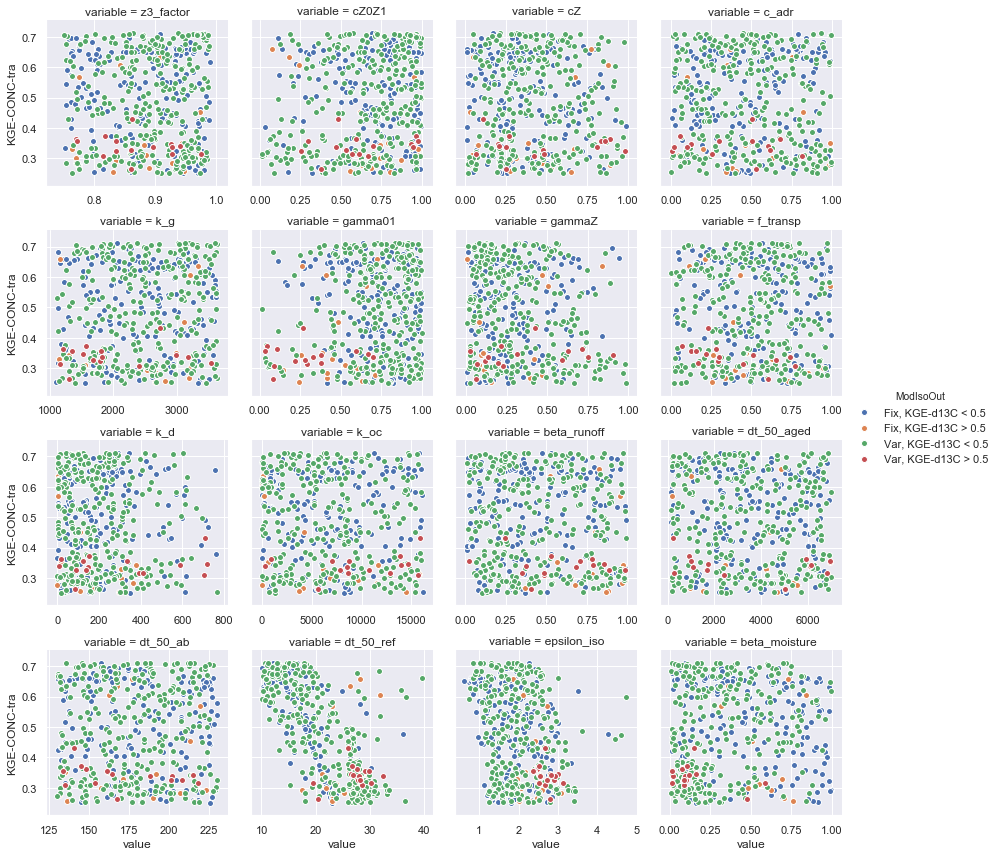

In [13]:
g = sns.FacetGrid(dm, col="variable", hue="ModIsoOut", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-CONC-tra", edgecolor="w").add_legend()

In [ ]:
# NASH - equivalent
# g = sns.FacetGrid(dm, col="variable", hue="ModIsoOut", col_wrap=4, sharex=False)
# g = g.map(plt.scatter, "value", "NSE-CONC-tra", edgecolor="w").add_legend()

## TODO:

Replot with only var-model

In [30]:
ff_out = ff_out.loc[(ff_out['Model'] == 'var')]

In [31]:
dm = pd.melt(ff_out, 
                 id_vars=['KGE-CONC-tra', 'NSE-CONC-tra', 'Model', 'ModIsoOut'],
             value_vars=['z3_factor',
                         'cZ0Z1',
                         'cZ',
                         'c_adr',
                         'k_g',
                         'gamma01',
                         'gammaZ',
                         'f_transp',
#                          'f_oc',
                         'k_d',
                         'k_oc',
                         'beta_runoff',
                         'dt_50_aged',
                         'dt_50_ab',
                         'dt_50_ref',
                         'epsilon_iso',
                         'beta_moisture'])

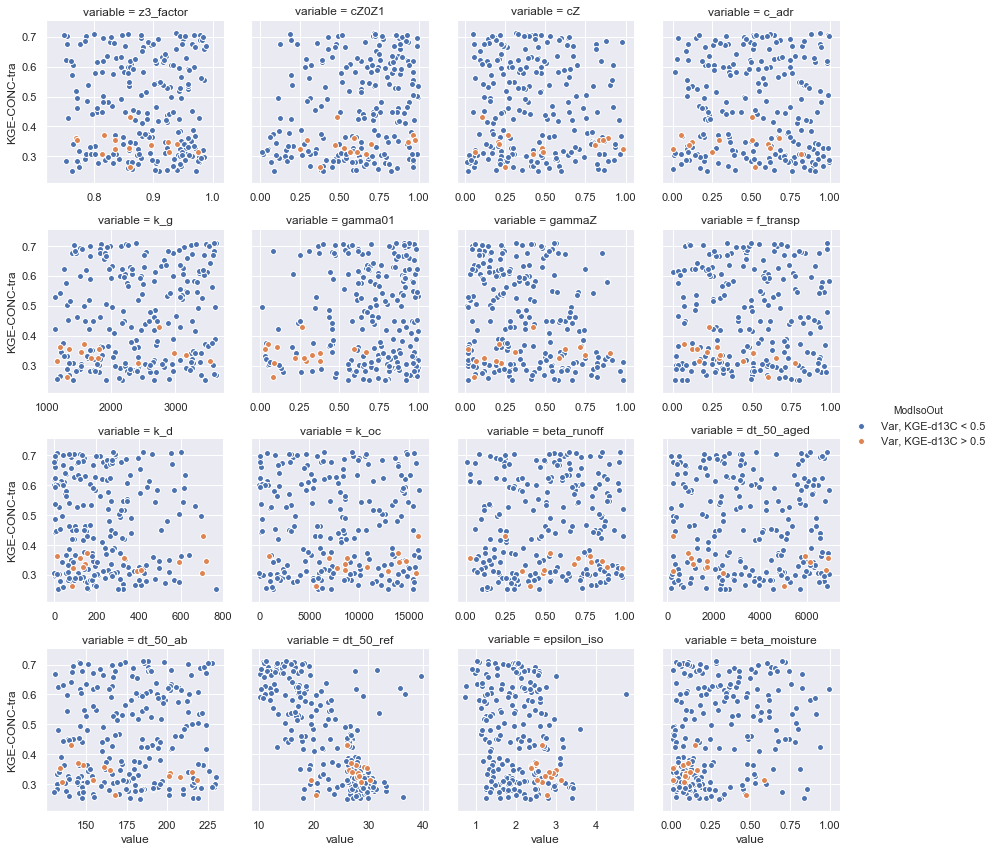

In [32]:
g = sns.FacetGrid(dm, col="variable", hue="ModIsoOut", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-CONC-tra", edgecolor="w").add_legend()

In [17]:
import numpy as np
5000*0.05

250.0